In [1]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

In [2]:
dataset_train = pd.read_csv("/kaggle/input/train-test-amazon1/train_test_amazon1.sample", header = None, delimiter = ' ')

In [3]:
print(dataset_train)

         0     1      2       3       4       5       6       7       8   \
0      7780  1616   6831  117961  117969    6725  125687  202487    6725   
1      8208  3725  20412  117890  117891  117878  117879  117879   19721   
2      1062  6982  51172  117961  118225  120551  120690  120691  290919   
3      3288  7102  46788  117929  117940  117920  118568  163031   19721   
4      8278  5785  19881  118006  118007  117941  118568  292195   19721   
...     ...   ...    ...     ...     ...     ...     ...     ...     ...   
32764  3835  7514   3608  117961  118052  120671  120418  232183  249618   
32765  2153  6284   1030  117961  118343  120722  118361  118362  118363   
32766   187  1919   7212  117961  118300  124725  124194  145500  118363   
32767  2736  3839   5504  117961  118300  118514  117905  117906  290919   
32768  8310  3352  15503  118573  118574  118623  118995  144259  292795   

           9       10  11  
0      125689   20895   1  
1      117880   31441   1  
2  

In [4]:
X = dataset_train.drop(columns = [11])
y = dataset_train.filter([11])
y = np.ravel(y)
print('X of dataset:',X)
print('y of dataset:',y)

X of dataset:          0     1      2       3       4       5       6       7       8   \
0      7780  1616   6831  117961  117969    6725  125687  202487    6725   
1      8208  3725  20412  117890  117891  117878  117879  117879   19721   
2      1062  6982  51172  117961  118225  120551  120690  120691  290919   
3      3288  7102  46788  117929  117940  117920  118568  163031   19721   
4      8278  5785  19881  118006  118007  117941  118568  292195   19721   
...     ...   ...    ...     ...     ...     ...     ...     ...     ...   
32764  3835  7514   3608  117961  118052  120671  120418  232183  249618   
32765  2153  6284   1030  117961  118343  120722  118361  118362  118363   
32766   187  1919   7212  117961  118300  124725  124194  145500  118363   
32767  2736  3839   5504  117961  118300  118514  117905  117906  290919   
32768  8310  3352  15503  118573  118574  118623  118995  144259  292795   

           9       10  
0      125689   20895  
1      117880   31441  
2

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) 

In [6]:
#uses stratified 5-fold cross-validation
max_score = 0
best_estimator = 50
best_learning_rate = 1.0
n_estimator_list = [50,100,150,200]
learning_rate_list = [1.0,2.0,3.0,5.0,7.0,9.0]

for e_ in n_estimator_list:
    for l_ in learning_rate_list:
        abc = AdaBoostClassifier(n_estimators=e_,learning_rate=l_)
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        score = cross_val_score(abc, X, y, cv=skf)
        score_mean = score.mean()
        if score_mean > max_score:
            best_scores = score
            max_score = score_mean
            best_estimator = e_
            best_learning_rate = l_
            y_probs = cross_val_predict(abc, X, y, cv=skf, method = 'predict_proba')
            
            f1_score_value = cross_val_score(abc, X, y, cv=skf, scoring='f1')
            recall_score_value = cross_val_score(abc, X, y, cv=skf, scoring='recall')
            precision_score_value = cross_val_score(abc, X, y, cv=skf, scoring='precision')

In [7]:
print("Cross-validation scores: {}".format(best_scores))
print("Average cross-validation score: {:.8f}".format(max_score))
print("Standard Deviation of scores: {:.8f}".format(best_scores.std()))
print("Best n_estimator and learning rate: ", best_estimator, best_learning_rate)

Cross-validation scores: [0.94247788 0.94217272 0.94202014 0.94217272 0.9423165 ]
Average cross-validation score: 0.94223199
Standard Deviation of scores: 0.00015460
Best n_estimator and learning rate:  150 1.0


In [8]:
f1_score_final = f1_score_value.mean()
recall_final = recall_score_value.mean()
precision_final = precision_score_value.mean()

In [9]:
print("Average F1 score: ", f1_score_final)
print("Average Recall score: ", recall_final)
print("Average Precision score: ", precision_final)

Average F1 score:  0.9702456709318643
Average Recall score:  0.9997408644583725
Average Precision score:  0.9424410233507071


In [10]:
y_probs_positive = y_probs[:, 1]
fpr, tpr, _ = roc_curve(y, y_probs_positive)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y, y_probs_positive)
average_precision = average_precision_score(y, y_probs_positive)

tpr_final = tpr.mean()
fpr_final = fpr.mean()

In [11]:
print('Average tpr:',tpr_final)
print('Average fpr:',fpr_final)

Average tpr: 0.6317743474374967
Average fpr: 0.3915708285638276


Average Area Under the PR Curve score:  0.9749748468685902


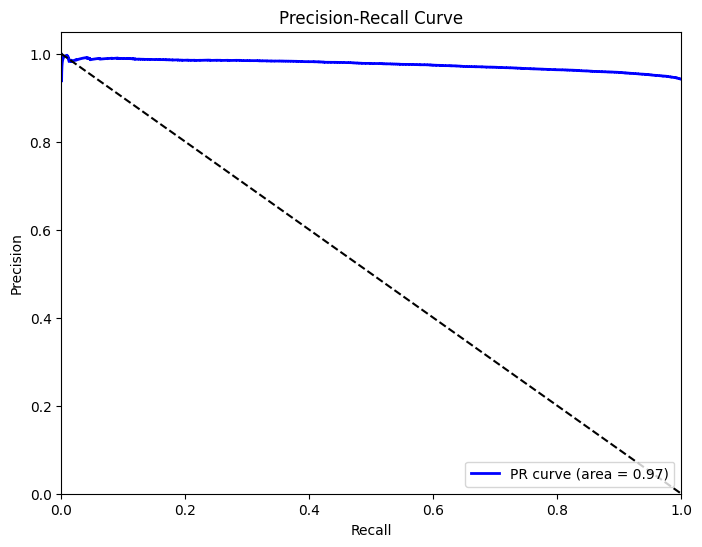

In [12]:
print("Average Area Under the PR Curve score: ", average_precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = {0:0.2f})'.format(average_precision))
plt.plot([0,1],[1,0], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/abc_S5KCV_prc_amazon.png')
plt.show()

Average Area Under the ROC Curve score:  0.7333940314100509


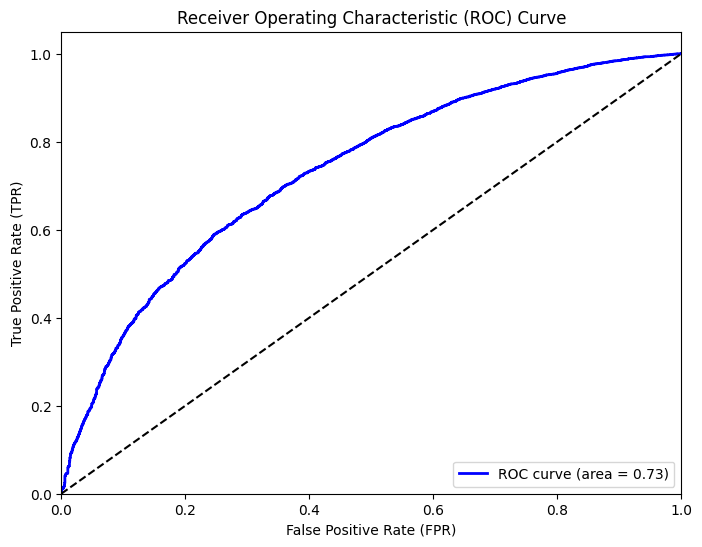

In [13]:
print("Average Area Under the ROC Curve score: ", roc_auc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('/kaggle/working/abc_S5KCV_roc_amazon.png')
plt.show()

In [14]:
output_file_path = '/kaggle/working/adaboost_amazon_scores.txt'
with open(output_file_path, 'w') as f: 
    f.write("F1 Score: {}\n".format(f1_score_final)) 
    f.write("Precision: {}\n".format(precision_final)) 
    f.write("Recall: {}\n".format(recall_final)) 
    f.write("PRC AUC: {}\n".format(average_precision)) 
    f.write("ROC AUC: {}\n".format(roc_auc)) 
    f.write("TPR: {}\n".format(tpr)) 
    f.write("FPR: {}\n".format(fpr))